<a href="https://colab.research.google.com/github/hydekage/Sistem-Automasi/blob/master/SISTEM_OTOMASI_MODUL_STABILITY.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Modul Kestabilan

## Pencarian akar / pole
Pole adalah nilai $s$ yang membuat penyebut dari fungsi alih $G(𝑠)$ menjadi nol.
$$G(s)=\frac{Y(s)}{U(s)}  ⇒ akar-akar \ dari \ U(s)=0 $$

Contoh:

$$G(s)=\frac{1}{s^3+4s^2+6s-2}$$

In [12]:
import sympy as sp
import matplotlib.pyplot as plt

# Definisikan variabel simbolik
s = sp.symbols('s')

# Definisikan persamaan karakteristik
# Misal: s^3 + 4s^2 + 6s - 2 = 0
char_eq = s**3 + 4*s**2 + 6*s - 2
display(char_eq)

# Cari akar-akarnya (pole)
poles = sp.solve(char_eq, s)

# Tampilkan hasil
numeric_poles = [sp.N(p) for p in poles]

for i in numeric_poles:
  print("hasil dari numeric poles:",i)

s**3 + 4*s**2 + 6*s - 2

hasil dari numeric poles: -2.13908153639907 - 1.61689738910596*I
hasil dari numeric poles: -2.13908153639907 + 1.61689738910596*I
hasil dari numeric poles: 0.278163072798149


## Visualisasi Pole

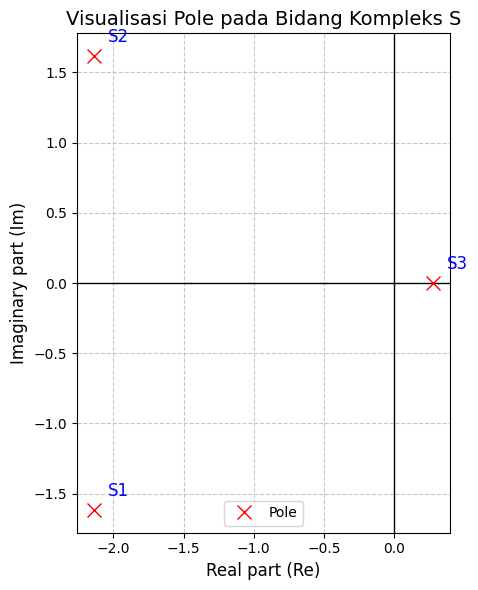

In [11]:
# 5. Pisahkan real dan imajiner
real_parts = [sp.re(p) for p in numeric_poles]
imag_parts = [sp.im(p) for p in numeric_poles]

# 6. Plotting
plt.figure(figsize=(6, 6))
plt.axhline(0, color='black', linewidth=1)  # sumbu horizontal
plt.axvline(0, color='black', linewidth=1)  # sumbu vertikal
plt.grid(True, linestyle='--', alpha=0.7)

# 7. Plot setiap pole
plt.plot(real_parts, imag_parts, 'rx', markersize=10, label='Pole')

# Tambahkan nama pole
for i, (x, y) in enumerate(zip(real_parts, imag_parts), start=1):
    plt.text(x + 0.1, y + 0.1, f"S{i}", fontsize=12, color='blue')

# 8. Label dan tampilan
plt.title("Visualisasi Pole pada Bidang Kompleks S", fontsize=14)
plt.xlabel("Real part (Re)", fontsize=12)
plt.ylabel("Imaginary part (Im)", fontsize=12)
plt.gca().set_aspect('equal', adjustable='box')
plt.legend()
plt.tight_layout()
plt.show()


### Analisis Plot Real dan Imajiner

Dua pole pertama berada di sebelah kiri bidang $𝑠$ → ✅ Stabil.

Satu pole berada di sebelah kanan bidang $s$ (real positif) → ❌ Tidak stabil.


# Analisis Kestabilan Sistem Menggunakan Metode Routh-Hurwitz

## 🎯 Tujuan
Menentukan apakah sistem **stabil atau tidak stabil** dengan menghitung jumlah **pole di sisi kanan bidang s** (*right-half of s-plane*) **tanpa menyelesaikan akar-akar dari polinomial**.

---

## 🧮 Persamaan Karakteristik

$s^3 + 4s^2 + 6s - 2 = 0$

---

## 📋 Langkah-Langkah Menyusun Tabel Routh-Hurwitz

### ✅ 1. Ambil Koefisien
Koefisien dari persamaan karakteristik:

$$[[1, \quad 4, \quad 6, \quad -2]]$$
Dari suku-suku:
$$ ( s^3 \rightarrow 1 )
( s^2 \rightarrow 4 )
( s^1 \rightarrow 6 )
( s^0 \rightarrow -2 )$$

---

### ✅ 2. Susun Dua Baris Pertama

| Baris   | Kolom 1 | Kolom 2 |
|---------|---------|---------|
| $(s^3)$ | 1       | 6       |
| $(s^2)$ | 4       | -2      |

---

### ✅ 3. Hitung Baris \(s^1\)


$$\frac{(4 \cdot 6) - (1 \cdot -2)}{4} = \frac{24 + 2}{4} = 6.5$$

| Baris   | Kolom 1 | Kolom 2 |
|---------|---------|---------|
| $s^1$) | 6.5     | 0       |

---

### ✅ 4. Hitung Baris \(s^0\)

$$\frac{(6.5 \cdot -2) - (4 \cdot 0)}{6.5} = -2$$

| Baris   | Kolom 1 |
|---------|---------|
| $(s^0)$ | -2      |

---

## 🔍 Tabel Akhir Routh-Hurwitz

| Baris   | Kolom 1 | Kolom 2 |
|---------|---------|---------|
| $(s^3)$ | 1       | 6       |
| $(s^2)$ | 4       | -2      |
| $(s^1)$ | 6.5     | 0       |
| $(s^0)$ | -2      |         |

---

## 🧭 Analisis Tanda Kolom Pertama

$$(s^3 = +1)$$
$$(s^2 = +4)$$
$$(s^1 = +6.5)$$
$$(s^0 = -2)$$

🔄 **Perubahan tanda terjadi antara $(s^1)$ dan $(s^0)$  
➡️ **Jumlah perubahan tanda: 1**

---

## ✅ Kesimpulan

- **Jumlah perubahan tanda = 1**
- Maka terdapat **1 pole di sisi kanan bidang ($s$)**.
- Artinya, sistem ini **tidak stabil**.

---

## 📌 Catatan Tambahan
Metode Routh-Hurwitz **tidak memberikan nilai pasti dari pole**, tetapi **dapat menentukan kestabilan sistem** hanya dengan memeriksa tanda pada kolom pertama tabel.
